Top 25 items with respect to support:
whole milk: 0.2533
other vegetables: 0.1909
rolls/buns: 0.1743
soda: 0.1719
yogurt: 0.1383
tropical fruit: 0.1081
root vegetables: 0.1048
bottled water: 0.1037
shopping bags: 0.0980
sausage: 0.0967
pastry: 0.0850
newspapers: 0.0815
bottled beer: 0.0796
citrus fruit: 0.0780
pip fruit: 0.0750
canned beer: 0.0743
fruit/vegetable juice: 0.0698
brown bread: 0.0678
whipped/sour cream: 0.0667
domestic eggs: 0.0598
frankfurter: 0.0559
pork: 0.0556
margarine: 0.0543
chocolate: 0.0533
coffee: 0.0531


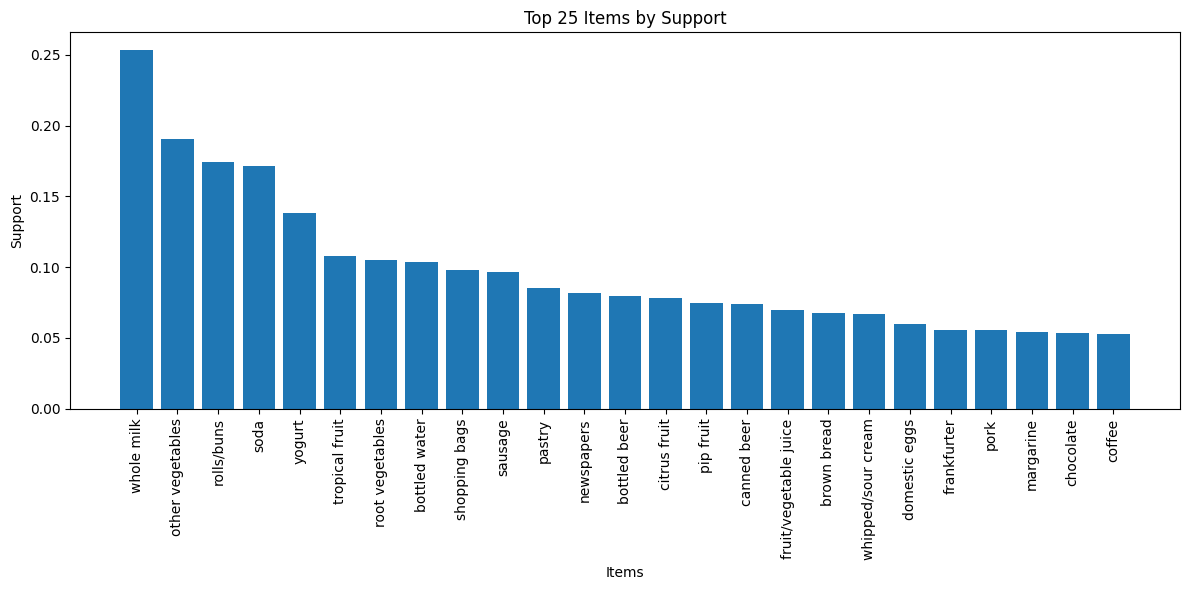

In [15]:
# Part (a): Find the top 25 items with respect to support
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
grocery_data = pd.read_csv('grocery_baskets.csv', header=None)

# Flatten the dataset into a single list of items
all_items = grocery_data.values.flatten()
all_items = all_items[~pd.isnull(all_items)]  # Remove NaN values

# Count the occurrence of each item
item_counts = Counter(all_items)

# Calculate support for each item
total_transactions = len(grocery_data)
item_support = {item: count / total_transactions for item, count in item_counts.items()}

# Get top 25 items by support
top_25_items = sorted(item_support.items(), key=lambda x: x[1], reverse=True)[:25]

# Display top 25 items with support
print("Top 25 items with respect to support:")
for item, support in top_25_items:
    print(f"{item}: {support:.4f}")

# Plot the top 25 items
items, supports = zip(*top_25_items)
plt.figure(figsize=(12, 6))
plt.bar(items, supports)
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Support')
plt.title('Top 25 Items by Support')
plt.tight_layout()
plt.show()


In [16]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Prepare the data for the Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(grocery_data.apply(lambda x: x.dropna().tolist(), axis=1)).transform(
    grocery_data.apply(lambda x: x.dropna().tolist(), axis=1))
df = pd.DataFrame(te_ary, columns=te.columns_)

# Define a function to generate and display association rules for given minsup and minconf
def generate_rules(minsup, minconf):
    # Generate frequent itemsets
    frequent_itemsets = apriori(df, min_support=minsup, use_colnames=True)

    # If older mlxtend needs `num_itemsets` param:
    num_itemsets = len(frequent_itemsets)

    # Add single-level rules
    if num_itemsets>0:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf, num_itemsets=num_itemsets)
    # Display the rules
        print(f"Association Rules for minsup={minsup} and minconf={minconf}:\n")
        if not rules.empty:
            for _, row in rules.iterrows():
                print(f"Rule: {row['antecedents']} -> {row['consequents']}")
                print(f"  Support: {row['support']:.4f}")
                print(f"  Confidence: {row['confidence']:.4f}")
                print(f"  Lift: {row['lift']:.4f}")
                print("-" * 40)
        else:
            print("No rules generated for these parameters.")
        return rules
    else:
        print("No rules generated for these parameters.")
        return  pd.DataFrame()
    

# Apply for the given (minsup, minconf) combinations
rules_1 = generate_rules(0.1, 0.6)
rules_2 = generate_rules(0.01, 0.2)
rules_3 = generate_rules(0.05, 0.3)
rules_4 = generate_rules(0.5, 0.7)


Association Rules for minsup=0.1 and minconf=0.6:

No rules generated for these parameters.
Association Rules for minsup=0.01 and minconf=0.2:

Rule: frozenset({'UHT-milk'}) -> frozenset({'other vegetables'})
  Support: 0.0100
  Confidence: 0.3000
  Lift: 1.5713
----------------------------------------
Rule: frozenset({'beef'}) -> frozenset({'other vegetables'})
  Support: 0.0207
  Confidence: 0.3958
  Lift: 2.0728
----------------------------------------
Rule: frozenset({'beef'}) -> frozenset({'rolls/buns'})
  Support: 0.0120
  Confidence: 0.2297
  Lift: 1.3180
----------------------------------------
Rule: frozenset({'beef'}) -> frozenset({'root vegetables'})
  Support: 0.0174
  Confidence: 0.3322
  Lift: 3.1690
----------------------------------------
Rule: frozenset({'beef'}) -> frozenset({'whole milk'})
  Support: 0.0213
  Confidence: 0.4064
  Lift: 1.6041
----------------------------------------
Rule: frozenset({'beef'}) -> frozenset({'yogurt'})
  Support: 0.0120
  Confidence: 0.

In [ ]:
import pandas as pd

def calculate_lift(rules, total_transactions):
    """
    Calculate and display LIFT values for the generated association rules.

    Parameters:
    rules (DataFrame): Association rules generated in part B.
    total_transactions (int): Total number of transactions in the dataset.
    """
    if rules.empty:
        print("No rules to calculate lift.\n")
        return
    
    print(f"\nLift Analysis for Generated Rules:\n")
    for _, row in rules.iterrows():
        antecedent = set(row['antecedents'])
        consequent = set(row['consequents'])
        # Recalculating lift for validation
        lift = (row['confidence'] * total_transactions) / (row['consequent support'] * total_transactions)
        print(f"Rule: {antecedent} -> {consequent}")
        print(f"  Support: {row['support']:.4f}")
        print(f"  Confidence: {row['confidence']:.4f}")
        print(f"  Lift: {lift:.4f} (Standard Lift: {row['lift']:.4f})")
        print("-" * 40)

# Calculate LIFT using rules from Part B and the total number of transactions
total_transactions = len(grocery_data)

# Perform lift analysis for each rule set from Part B
print("Lift for rules (minsup=0.1, minconf=0.6):")
calculate_lift(rules_1, total_transactions)

print("Lift for rules (minsup=0.01, minconf=0.2):")
calculate_lift(rules_2, total_transactions)

print("Lift for rules (minsup=0.05, minconf=0.3):")
calculate_lift(rules_3, total_transactions)

print("Lift for rules (minsup=0.5, minconf=0.7):")
calculate_lift(rules_4, total_transactions)

Lift for rules (minsup=0.1, minconf=0.6):
No rules to calculate lift.

Lift for rules (minsup=0.01, minconf=0.2):

Lift Analysis for Generated Rules:

Rule: {'UHT-milk'} -> {'other vegetables'}
  Support: 0.0100
  Confidence: 0.3000
  Lift: 1.5713 (Standard Lift: 1.5713)
----------------------------------------
Rule: {'beef'} -> {'other vegetables'}
  Support: 0.0207
  Confidence: 0.3958
  Lift: 2.0728 (Standard Lift: 2.0728)
----------------------------------------
Rule: {'beef'} -> {'rolls/buns'}
  Support: 0.0120
  Confidence: 0.2297
  Lift: 1.3180 (Standard Lift: 1.3180)
----------------------------------------
Rule: {'beef'} -> {'root vegetables'}
  Support: 0.0174
  Confidence: 0.3322
  Lift: 3.1690 (Standard Lift: 3.1690)
----------------------------------------
Rule: {'beef'} -> {'whole milk'}
  Support: 0.0213
  Confidence: 0.4064
  Lift: 1.6041 (Standard Lift: 1.6041)
----------------------------------------
Rule: {'beef'} -> {'yogurt'}
  Support: 0.0120
  Confidence: 0.2297
